## Tarea 1 

### Problema 1 

Los algoritmos de integración númerica que se piden intentan resolver una ecuación diferencial en la que se tiene una expresión directa($\vec f(x1,x2,...,x_n,t)$) de la  primera derivada de una función\frac{d\vec x}{dt} , sujeta a condiciones iniciales (\vec y_0 al tiempo t). ie
$$ \frac{d\vec x}{dt} =  \vec f(x_1,x_2,...,x_n,t); \hspace{1cm} \vec x = \vec x_0 \,\,a\,\, t$$
Para solucionar esta ecuación en los intervalos $[x_i,x_f] \forall x_j$ se particionan estos intervalos en subintervalos de longitud $h$ y posteriormente se hace una aproximación  de la función en estos intervalos. Con esto se encuentra la función como la suma de los productos de la mejor aproximación por el subintervalo h. (En general h podría variar y ser más pequeña en los lugares que se requiera más precision). Entonces los métodos de integración se diferencían por la forma en la que aproximan la función en dichos subintervalos. Normalmente los procesos son interativos, y la función en $x_n=x_i+nh$ se obtiene de los valores obtenidos en $x_m$ con $m<n$. 
#### Método de euler.
Se aproxima la función en el lado derecho del intervalo como una recta (plano) con pendiente(s) igual(es) a la que tendría la función en ese punto y que pasa por el valor de la función obtenida númericamente en el lado izquierdo del intervalo. ie 
$$\vec x_{n+1}= \vec y_{n} +    \vec f(x_1,x_2,...,x_n,t)h $$

#### Expansión en taylor al segundo orden. 
Se aproxima $\vec f(x1,x2,...,x_n,t)$ a la función evaluada en el lado izquierdo del subintevalo más la derivada de f evaluada en el lado izquierdo. posteriormente se integra la derivada en el subintervalo y se le suma el valor anterior de la función, lo que se obtiene es:
$$ x_{n+1}=x_{n}+ \vec f(x_1,x_2,...,x_n,t)h+ \frac{d\vec f}{d \vec x}\frac{h^2}{2}$$
y $\frac{d\vec f}{d \vec x}= \frac{\partial f}{\partial t}+\mathbb{J}\frac{d\vec y}{d t}$ donde $\mathbb{J}$ es el jacobiano de la función.
#### Métodos de Runge kutta.
En el método anterior es necesario ingresar directamente al programa la forma de las derivadas de la función $\vec f$, El método de runge kutta se deshace de esto aproximando las derivadas de $\vec f$ mediante la evualuación de la función en diferentes puntos, junto con la resolución de la expansión en series de taylor de la función en dichos puntos.
##### 2do orden.
$$
\vec{x_{n+1}}=\vec{x_n}+ h\vec {f(\vec{x_n}+ \frac{h}{2} \vec f(\vec x_n,t_n),t_{n}+h/2)}
$$

##### 4to orden 
$$
\vec x_{n+1}=\vec x_n+h(\frac{k_1}{6}+\frac{k_2}{3}+\frac{k_3}{3}+\frac{k_4}{6})
$$
con
$$
\begin{aligned}
k_1&=\vec{f}(\vec{x_n},t_n)\\
k_2&=f(\vec x_n+h/2 k_1,t_n +h/2)\\
k_3&=f(\vec x_n+h/2 k_2,t_n +h/2)\\
k_4&=\vec{f}(\vec{x_n}+h k_3,t_n+h)\\
\end{aligned}
$$

A continuación se programan los métodos en el mismo orden.

In [1]:
from pylab import *
from numpy import *
%matplotlib inline

In [2]:
#Método de Euler
def meuler(funcion,p_ini,x,h=0.01): 
    #X es el intervalo en el que se resuelve la ecuación.
    
    #Se define el dominio:
    tiempos=arange(x[0],x[1]+h,h)     
    #creamos un arreglo en el que se guardará la solución:
    sol=zeros((len(tiempos),len(p_ini))) 
    # Aplicamos la condicion inicial:
    sol[0,:] = p_ini
    #usamos la iteración del método de euler:
    for i in range(len(tiempos)-1):
        sol[i+1,:] = sol[i,:]+funcion(sol[i,:],tiempos[i])*h 
    return tiempos,sol

In [3]:
#Método Taylor a segundo orden
def mtaylor2(funcion, d_funcion, p_ini, x, h=0.01):
    #  df = d_funcion(p_ini)[0],   Jacobiano = d_funcion(p_ini)[1]
    #Se define el dominio:
    tiempos=arange(x[0],x[1]+h,h)  
    #creamos un arreglo en el que se guardará la solución:
    sol=zeros((len(tiempos),len(p_ini)))
    # Aplicamos la condicion inicial:
    sol[0,:] = p_ini
    #usamos la iteración del método de taylor:
    for i in arange(len(tiempos)-1): 
        f=funcion(sol[i,:],tiempos[i])
        df,jac=d_funcion(sol[i,:], tiempos[i])       #Se actualizan los valores de d_funcion
        sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f))  #Usamos el método para construir la solución
    return  tiempos,sol

In [4]:
#Método de Runge Kutta a 2do orden
# definiciones análogas a los métodos anteriores.
def ruku2(funcion, p_ini, x, h=0.01):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):    
        k=funcion(sol[i,:], tiempos[i])*h
        sol[i+1,:]=sol[i,:]+h*funcion(sol[i,:]+0.5*k, tiempos[i]+.5*h)
    return  tiempos,sol

In [5]:
#Método de Runge Kutta a 4to orden
def ruku4(funcion, p_ini, x, h=0.01):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):   
        k1 = funcion(sol[i,:], tiempos[i])
        k2 = funcion(sol[i,:]+.5*k1*h, tiempos[i]+0.5*h)
        k3 = funcion(sol[i,:]+.5*k2*h, tiempos[i]+0.5*h)
        k4 = funcion(sol[i,:]+k3*h, tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return  tiempos,sol


### Prueba de los integradores 
La resolucion de una ecuación diferencial lineal de orden superior se puede reducir a un sistema de ecuaciones lineales de primer orden. Haciendo las sustituciones $x=x_1$ , $\dot x = x_2$ $\ddot x = x_3$ etc. Así la ecuacion de la tarea se convierte en
$$\dot x_1= x_2$$ 
$$ \dot x_2 = e^{-t}sin(3t)-0.5x_2-\sin x_1$$
$x_1(0)=0$ y $x_2(0)=1$

Entonces a continuacion programamos este sistema de  ecuaciones y su derivada.




In [6]:
def prueba(x,t) :
    return array([x[1],exp(-t)*sin(3*t)-0.5*x[1]-sin(x[0])])


def d_prueba(x,t):
    return array([0,exp(-t)*(-sin(3*t)+3*cos(3*t))]),array([[0,1],[-cos(x[0]),-0.5]]) 

Ahora se resuelve la funcion prueba con los cuatro métodos y se gráfican juntos.

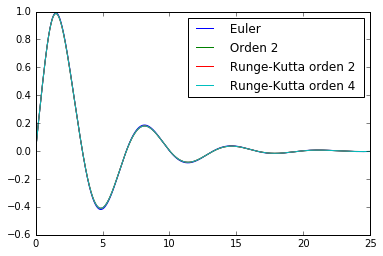

In [7]:
# se usa h=0.01 desde t=0 a t= 100
t_1,x_1=meuler(prueba,[0,1],[0,25])
t_2,x_2=mtaylor2(prueba,d_prueba,[0,1],[0,25])  
t_3,x_3=ruku2(prueba,[0,1],[0,25]) 
t_4,x_4=ruku4(prueba,[0,1],[0,25])

plot(t_1,x_1[:,0], label=" Euler " )
plot(t_2,x_2[:,0], label=" Orden 2")
plot(t_3,x_3[:,0], label=" Runge-Kutta orden 2 ")
plot(t_4,x_4[:,0], label=" Runge-Kutta orden 4")
legend()


No se aprecia ninguna discrepancia significativa. con h=0.01

## Problema 2

Igual que antes convertimos la ecuacion de orden superior en un sistema de ecuaciones de primer orden, el sistema queda:
$$\dot x_1= x_2$$
$$\dot x_2= x_3$$
$$\dot x_3= e^{-t}\sin(3t)-\cos^2(x_1)+3x_2^3-x_3^2$$
con condiciones iniciales $x_1(1)=1$, $x_2(1)= 2 $, $x_3(1)=1$

A continuación programamos el sistema y su derivada.

In [8]:
def funcionp2(x,t):                          
    return array([x[1],x[2],exp(-t)*sin(3.*t)+3.*x[1]**3.-(cos(x[0]))**2-(x[2])**2])
def d_funcionp2(x,t):
    return array([0,0,exp(-t)*(-sin(3.*t)+3.*cos(3.*t))]),\
           array([[0,1,0],[0,0,1],[2.*cos(x[0])*sin(x[0]),9*x[1]**2,-2.*x[2]]])


In [26]:
#Método de Euler
t_1,x_1=meuler(funcionp2,[1,2,1],[1,2.1],h=0.00001)
t_2,x_2=meuler(funcionp2,[1,2,1],[1,2.1],h=0.000001)
t_3,x_3=meuler(funcionp2,[1,2,1],[1,2.1],h=0.0000001)






/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


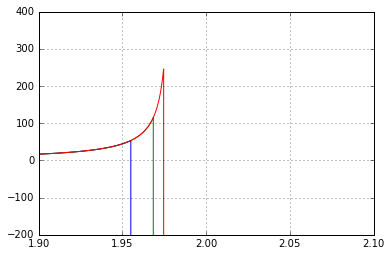

In [27]:
plot(t_1,x_1[:,0])
plot(t_2,x_2[:,0])
plot(t_3,x_3[:,0])





plt.ylim([-200,400])
plt.xlim([1.9,2.1])
grid(True)
show()



/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in add


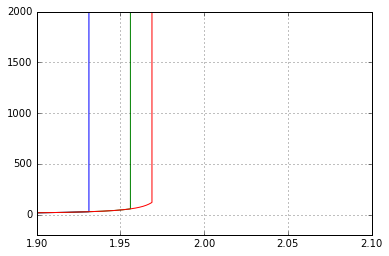

In [42]:
#método de taylor a segundo orden
t_1,x_1 = mtaylor2(funcionp2,d_funcionp2 , [1,2,1],[1,2.1], h=0.0001)
t_2,x_2 = mtaylor2(funcionp2,d_funcionp2 , [1,2,1],[1,2.1],h=0.00001)
t_3,x_3 = mtaylor2(funcionp2,d_funcionp2 , [1,2,1],[1,2.1], h=0.000001)



plot(t_1,x_1[:,0])
plot(t_2,x_2[:,0])
plot(t_3,x_3[:,0])

plt.ylim([-200,2000])
plt.xlim([1.9,2.1])
grid(True)
show()



/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


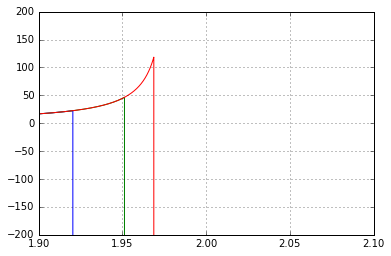

In [44]:
#metodo de runge kutta a segundo orden
t_1,x_1 = ruku2(funcionp2, [1,2,1],[1,2.1], h=0.0001)
t_2,x_2 = ruku2(funcionp2, [1,2,1],[1,2.1], h=0.00001)
t_3,x_3 = ruku2(funcionp2, [1,2,1],[1,2.1], h=0.000001)



plot(t_1,x_1[:,0])
plot(t_2,x_2[:,0])
plot(t_3,x_3[:,0])

plt.ylim([-200,200])
plt.xlim([1.9,2.1])
grid(True)
show()

/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/jorgetorres/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


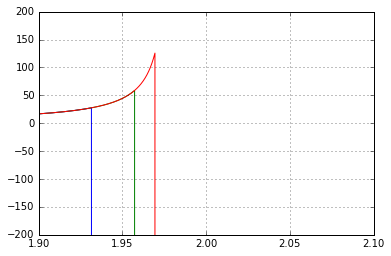

In [45]:
#metodo de runge kutta a cuarto orden
t_1,x_1 = ruku4(funcionp2, [1,2,1],[1,2.1], h=0.0001)
t_2,x_2 = ruku4(funcionp2, [1,2,1],[1,2.1], h=0.00001)
t_3,x_3 = ruku4(funcionp2, [1,2,1],[1,2.1], h=0.000001)



plot(t_1,x_1[:,0])
plot(t_2,x_2[:,0])
plot(t_3,x_3[:,0])

plt.ylim([-200,200])
plt.xlim([1.9,2.1])
grid(True)
show()

En todos los integradores excepto en el de taylor se observa que despues de t=1.95 la funcion crece para luego diverger hacia menos infinito repentinamente, sin embargo la altura de ese crecimiento inicial es mayor entre más grande sea la precisión del integrador. Esto ultimo me hace creer que el maximo inicial es en realidad una divergencia tambien, pero esta solo se puede obtener con precisión muy grande ( y tiempos de computo muy largos). Además el comportamiento del integrador de taylor apoya la teória anterior, en este caso la función diverge hacía infinito y ahí se quedan trabados los cálculos.
Lo que se piensa es que las divergencias teóricas se encuentran entre el intervalo [2,2.1] por lo que en ese rango no habría un "mejor paso" pues simplemente los métodos de integración no pueden lidiar con esta clase de funciones. Mientras que en el intervalo [1,2] no habría esta clase de problemas y bastaría encontrar una h suficientemente pequeña  de forma que las divergencias obtenidas se obtuvieran más alla de 2, sin embargo para esto es necesario una precisión mayor con  un paso h menor a $1\times 10^{-6}$ y tiempos de computo mas largos de los que se pudieron destinar a esta tarea. 

## Problema 3 
Se modifica el integrador con el método de euler, posteriormente se resuelve el problema. Al final se ponen el resto de los integradores modificados.


In [10]:
#Método de Euler con argumentos opcionales (modificado)
def meulerm(funcion,p_ini,x,h=0.01,args = ""): 
    #X es el intervalo en el que se resuelve la ecuación.
    #Se define el dominio:
    tiempos=arange(x[0],x[1]+h,h)     
    #creamos un arreglo en el que se guardará la solución:
    sol=zeros((len(tiempos),len(p_ini))) 
    # Aplicamos la condicion inicial:
    sol[0,:] = p_ini
    #usamos la iteración del método de euler en los casos en que hay y no argumentos extras.
    if args == "":
        
        for i in range(len(tiempos)-1):
            sol[i+1,:] = sol[i,:]+funcion(sol[i,:],tiempos[i])*h 
        
    else: 
        for i in range(len(tiempos)-1):
            sol[i+1,:] = sol[i,:]+funcion(sol[i,:],tiempos[i],args)*h 
    
    return tiempos,sol

In [11]:
def funcionp3(x,t,w):
    return array([x[1],-0.1*x[1]-4.*sin(x[0])+0.5*sin(w*t)])
def d_funcionp3(x,t,w):
    return array([0.,0.5*w*cos(w*t)]), array([[0.,1.],[-4.*cos(x[0]),-0.1]])

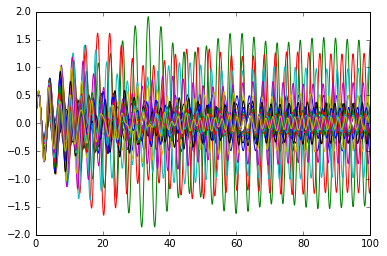

In [12]:
for w in arange(1,3,0.1):
    t,sol_p3 = meulerm(funcionp3,[0,1],[0,100],0.001,w)
    plot(t,sol_p3[:,0])
show()

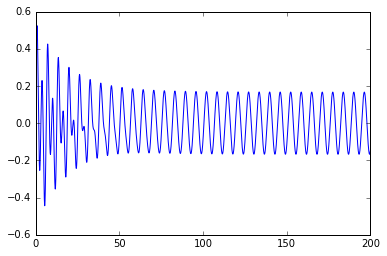

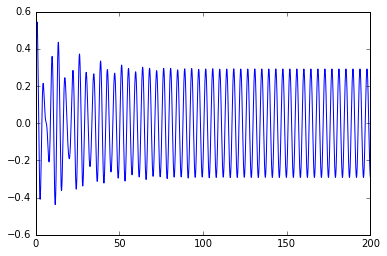

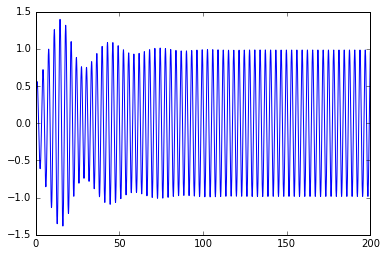

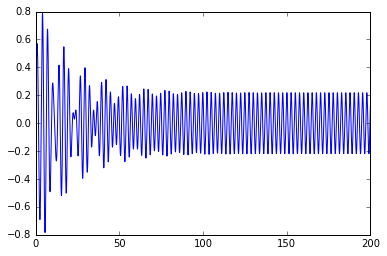

In [46]:
for w in arange(1,3,0.5):
    t,sol_23 = meulerm(funcionp3,[0,1],[0,200],0.001,w)
    plot(t,sol_23[:,0], label="w=%s")
    show()

De la forma de la ecuación diferencial podemos interpretarla como un oscilador armonicos, con fricción proporcional a la velocidad y forzado sinusoidalmente con frecuencia w.
Se observa que:
* El sistema llega a un movimiento oscilatorio estacionado.
* El frecuencia del movimiento estacionario aumenta al aumentar w
* La amplitud del movimiento estacionario disminuye al aumentar w.

Esto puede ser interpretado como que el oscilador cede al efecto de la fuerza externa a final de cuentas.
Como la amplitud de la fuerza externa es constante $\frac{1}{2}$ la potencia que entra al sistema es proporcional a la amplitud por la frecuencia(fuerza por distancia por unidad de tiempo)  mientras que la energia perdida por la friccion es del orden de la velocidad multiplicada por la amplitud por la frecuencia que es a su vez proporcional a la frecuencua angular al cuadrado. Entonces al aumentar la frecuencia las perdidas energeticas por friccion aumentan mas rapido que la potencia de entrada por lo que el sistema tiene menos energia en un instante dado, lo que se ve reflejado en la disminucion de la amplitud.


A continuación el resto de los integradores con argumentos opcionales.

In [ ]:
#Método Taylor a segundo orden con argumentos opcionales (modificado)
def mtaylor2m(funcion, d_funcion, p_ini, x, h=0.01,args=""):
    #  df = d_funcion(p_ini)[0],   Jacobiano = d_funcion(p_ini)[1]
    #Se define el dominio:
    tiempos=arange(x[0],x[1]+h,h)  
    #creamos un arreglo en el que se guardará la solución:
    sol=zeros((len(tiempos),len(p_ini)))
    # Aplicamos la condicion inicial:
    sol[0,:] = p_ini
    #usamos la iteración del método de taylor:
    if args == " " :
        for i in arange(len(tiempos)-1): 
            f=funcion(sol[i,:],tiempos[i])
            df,jac=d_funcion(sol[i,:], tiempos[i])       #Se actualizan los valores de d_funcion
            sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f))  #Usamos el método para construir la solución
    else :
        for i in arange(len(tiempos)-1): 
            f=funcion(sol[i,:],tiempos[i],args)
            df,jac=d_funcion(sol[i,:], tiempos[i],args)       #Se actualizan los valores de d_funcion
            sol[i+1,:]=sol[i,:]+h*f+0.5*h*h*(df+ dot (jac,f))  #Usamos el método para construir la solución
    
    return  tiempos,sol

In [ ]:
#Método de Runge Kutta a 2do orden con argumentos opcionales (modificado)
# definiciones análogas a los métodos anteriores.
def ruku2m(funcion, p_ini, x, h=0.01,args=""):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    if args == "":
        for i in range(len(tiempos)-1):    
            k=funcion(sol[i,:], tiempos[i])*h
            sol[i+1,:]=sol[i,:]+h*funcion(sol[i,:]+0.5*k, tiempos[i]+.5*h)
    else :
        for i in range(len(tiempos)-1):    
            k=funcion(sol[i,:], tiempos[i],args)*h
            sol[i+1,:]=sol[i,:]+h*funcion(sol[i,:]+0.5*k, tiempos[i]+.5*h,args)
    
    return  tiempos,sol

In [ ]:
#Método de Runge Kutta a 4to orden con argumentos opcionales (modificado)
def ruku4(funcion, p_ini, x, h=0.01):
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))   
    sol[0,:] = p_ini
    if args== "":
            for i in range(len(tiempos)-1):   
                k1 = funcion(sol[i,:], tiempos[i])
                k2 = funcion(sol[i,:]+.5*k1*h, tiempos[i]+0.5*h)
                k3 = funcion(sol[i,:]+.5*k2*h, tiempos[i]+0.5*h)
                k4 = funcion(sol[i,:]+k3*h, tiempos[i]+h)
                sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else :
             for i in range(len(tiempos)-1):   
                k1 = funcion(sol[i,:], tiempos[i],args)
                k2 = funcion(sol[i,:]+.5*k1*h, tiempos[i]+0.5*h,args)
                k3 = funcion(sol[i,:]+.5*k2*h, tiempos[i]+0.5*h,args)
                k4 = funcion(sol[i,:]+k3*h, tiempos[i]+h,args)
                sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
            
    return  tiempos,sol



## Problema 4
Programamos el sistema de ecuaciones dado. Elijo el método de Euler.

In [15]:
def funcionp4(x,t):
    return array([10.*(x[1]-x[0]),x[0]*(28.-x[2])-x[1],x[0]*x[1]-(8/3)*x[2]])

In [16]:
x_0,y_0,z_0 = 5*rand(), 5*rand(), 5*rand()
print x_0,y_0,z_0 

3.63435862663 0.187418974358 4.25657947786


Inciso a)

/Users/jorgetorres/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


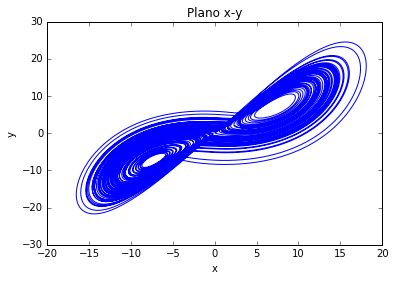

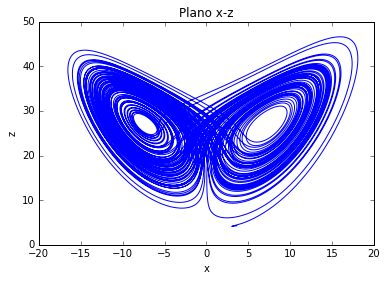

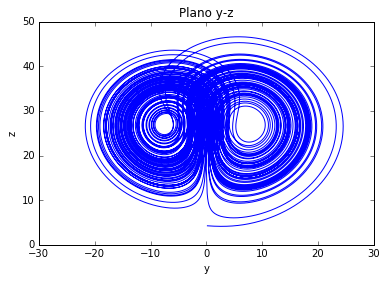

In [17]:
t, sol_p4 = meuler(funcionp4,[x_0,y_0,z_0],[0,100],0.0005)

#grafica xy
plot(sol_p4[:,0],sol_p4[:,1])
xlabel('x')
ylabel('y')
legend()
plt.title(u'Plano x-y')
show()
#grafica xz
plot(sol_p4[:,0],sol_p4[:,2])
xlabel('x')
ylabel('z')
legend()    
plt.title(u'Plano x-z')
show()
#grafica yx
plot(sol_p4[:,1],sol_p4[:,2])
xlabel('y')
ylabel('z')
legend()   
plt.title(u'Plano y-z')
show()



De ir variando el rango en el que se integra la ecuación se observa que conforme el tiempo pasa la trayectoria describe oscilaciones alrededor de las dos regiones blancas.

No se obtuvo un patrón en especifico sobre el numero de vueltas que da alrededor de una de las regiones antes de irse a la otra, pero parece que da más vueltas alrededor de la región de la izquierda. Tampoco se encontró patrón aparente sobre el diametró medio de los lazos que formaban al girar en torno a las regiones blancas.

inciso b)

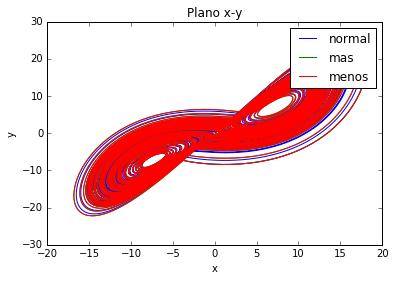

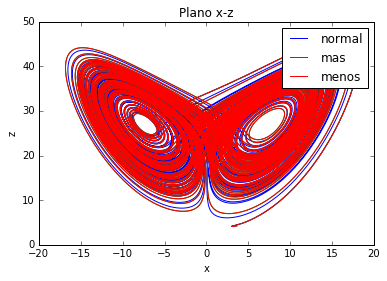

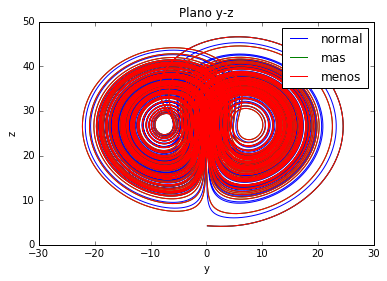

In [18]:
#solución con condicion inicial ligeramente diferente.
#rango de 0 a 100.
t, sol_p4mas = meuler(funcionp4,[x_0,y_0+.001,z_0],[0,100],0.0005)
t, sol_p4menos = meuler(funcionp4,[x_0,y_0+.001,z_0],[0,100],0.0005)

#grafica xy
plot(sol_p4[:,0],sol_p4[:,1],label= "normal")
plot(sol_p4mas[:,0],sol_p4mas[:,1],label= "mas")
plot(sol_p4mas[:,0],sol_p4mas[:,1],label= "menos")




xlabel('x')
ylabel('y')
legend()
plt.title(u'Plano x-y')
show()
#grafica xz
plot(sol_p4[:,0],sol_p4[:,2],label= "normal")
plot(sol_p4mas[:,0],sol_p4mas[:,2],label= "mas")
plot(sol_p4mas[:,0],sol_p4mas[:,2],label= "menos")



xlabel('x')
ylabel('z')
legend()    
plt.title(u'Plano x-z')
show()
#grafica yx
plot(sol_p4[:,1],sol_p4[:,2],label= "normal")
plot(sol_p4mas[:,1],sol_p4mas[:,2],label= "mas")
plot(sol_p4mas[:,1],sol_p4mas[:,2],label= "menos")
xlabel('y')
ylabel('z')
legend()   
plt.title(u'Plano y-z')
show()





El comportamiento es igual de erratico en los tres casos, sin embargo de evaluar en tiempos no tan largos se observa que las trayectorias son muy diferentes, es decir, dependen fuertemente de las condiciones iniciales. Al igual que en el péndulo doble este es un indicio de movimiento caótico.